## Let's start the notebook

In [52]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
df_web = pd.read_excel("web.xlsx")
df_erp = pd.read_excel("erp.xlsx")
df_liaison = pd.read_excel("liaison.xlsx")

df_web_origin, df_erp_origin, df_liaison_origin = df_web, df_erp, df_liaison

C:\Users\Utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [39]:
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [32]:
df_first_merge = pd.merge(df_erp, df_liaison, left_on='product_id', right_on='product_id', how="inner")
df_full = pd.merge(df_first_merge, df_web, left_on='id_web', right_on='sku', how="inner")

In [35]:
df_clean = df_full.drop_duplicates(subset=['sku'])

In [36]:
print(df_clean.head())
print(df_clean.info())
print(df_clean.describe())

   product_id  onsale_web  price  stock_quantity stock_status id_web    sku  \
0        3847           1   24.2               0   outofstock  15298  15298   
2        3849           1   34.3               0   outofstock  15296  15296   
4        3850           1   20.8               0   outofstock  15300  15300   
6        4032           1   14.1               0   outofstock  19814  19814   
8        4039           1   46.0               0   outofstock  19815  19815   

   virtual  downloadable  rating_count  ...  \
0        0             0             0  ...   
2        0             0             0  ...   
4        0             0             0  ...   
6        0             0             0  ...   
8        0             0             0  ...   

                                           post_name       post_modified  \
0        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
4  pierre-jean

In [49]:
df_out = df_clean[['price' , 'total_sales']]
df_out

,price,total_sales
0,24.2,6.0
2,34.3,0.0
4,20.8,0.0
6,14.1,3.0
8,46.0,0.0
...,...,...
9153,8.4,5.0
9155,27.5,0.0
9157,69.0,0.0
9159,54.8,0.0


<AxesSubplot:title={'center':'price'}, xlabel='total_sales'>

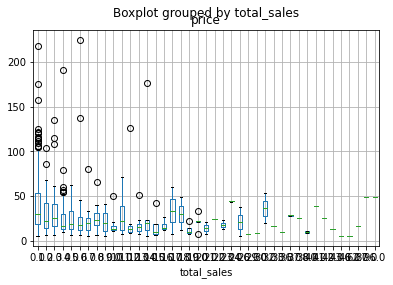

In [50]:
df_out.boxplot('price', 'total_sales')

<AxesSubplot:xlabel='price'>

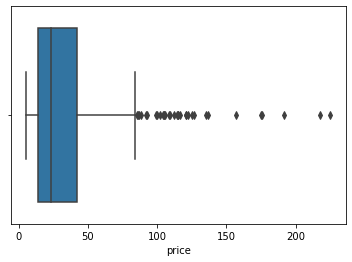

In [55]:
sns.boxplot(x='price', data= df_out)